In [71]:
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import seaborn as sns
import pandas as pd
from functools import reduce
#!pip install getFamaFrenchFactors
import getFamaFrenchFactors as gff
#!pip install fredapi
from fredapi import Fred
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

### Fama French

In [9]:
data_ff5 = pd.read_csv('/Users/parvathypillai/Desktop/Fintech/FinalProject/F-F_Research_Data_5_Factors_2x3_daily.CSV', skiprows=3)

In [10]:
data_ff5.rename(columns = {'Unnamed: 0':'Date'},inplace=True)

In [11]:
data_ff5['Date']=data_ff5['Date'].apply(str)


In [12]:
data_ff5.head()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19630701,-0.67,0.02,-0.35,0.03,0.13,0.012
1,19630702,0.79,-0.28,0.28,-0.08,-0.21,0.012
2,19630703,0.63,-0.18,-0.10,0.13,-0.25,0.012
3,19630705,0.40,0.09,-0.28,0.07,-0.30,0.012
4,19630708,-0.63,0.07,-0.20,-0.27,0.06,0.012


In [13]:
data_ff5.reset_index(drop = True, inplace= True)
data_ff5 = data_ff5[(data_ff5.Date > '20200101') & (data_ff5.Date <= '20231231')]
data_ff5['Date']=pd.to_datetime(data_ff5['Date'])
data_ff5

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
14223,2020-01-02,0.86,-0.97,-0.34,0.24,-0.22,0.006
14224,2020-01-03,-0.67,0.30,0.00,-0.14,-0.10,0.006
14225,2020-01-06,0.36,-0.20,-0.55,-0.17,-0.26,0.006
14226,2020-01-07,-0.19,-0.03,-0.25,-0.12,-0.25,0.006
14227,2020-01-08,0.47,-0.17,-0.64,-0.19,-0.17,0.006
...,...,...,...,...,...,...,...
15183,2023-10-25,-1.58,-0.02,0.84,1.50,0.20,0.021
15184,2023-10-26,-1.15,1.19,1.66,-0.76,0.48,0.021
15185,2023-10-27,-0.53,-0.58,-0.57,0.42,-0.96,0.021
15186,2023-10-30,1.15,-0.34,0.28,-0.14,0.17,0.021


In [14]:
df_ffs = data_ff5.set_index('Date')

In [15]:
df_ffs

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2020-01-02,0.86,-0.97,-0.34,0.24,-0.22,0.006
2020-01-03,-0.67,0.30,0.00,-0.14,-0.10,0.006
2020-01-06,0.36,-0.20,-0.55,-0.17,-0.26,0.006
2020-01-07,-0.19,-0.03,-0.25,-0.12,-0.25,0.006
2020-01-08,0.47,-0.17,-0.64,-0.19,-0.17,0.006
...,...,...,...,...,...,...
2023-10-25,-1.58,-0.02,0.84,1.50,0.20,0.021
2023-10-26,-1.15,1.19,1.66,-0.76,0.48,0.021
2023-10-27,-0.53,-0.58,-0.57,0.42,-0.96,0.021


### ADS Index

In [17]:
data_ads = pd.read_excel('/Users/parvathypillai/Desktop/Fintech/FinalProject/ADS Index Most Current Vintage.xlsx')

In [18]:
data_ads

,Unnamed: 0,ADS_Index
0,1960:03:01,-0.572930
1,1960:03:02,-0.621487
2,1960:03:03,-0.666982
3,1960:03:04,-0.709432
4,1960:03:05,-0.748855
...,...,...
23282,2023:11:28,-0.147276
23283,2023:11:29,-0.143545
23284,2023:11:30,-0.140216
23285,2023:12:01,-0.137288


In [19]:
data_ads.rename(columns = {'Unnamed: 0':'Date'},inplace=True)

In [20]:
data_ads['Date'] = data_ads['Date'].str.replace(':', '-')

In [21]:
data_ads = data_ads[(data_ads.Date > '2020-01-01') & (data_ads.Date <= '2023-12-31')]

In [22]:
data_ads['Date'] = pd.to_datetime(data_ads['Date'])

In [23]:
df_ads = data_ads.set_index('Date')

In [24]:
df_ads

,ADS_Index
Date,
2020-01-02,-0.308743
2020-01-03,-0.292342
2020-01-04,-0.276362
2020-01-05,-0.260796
2020-01-06,-0.245729
...,...
2023-11-28,-0.147276
2023-11-29,-0.143545
2023-11-30,-0.140216


### Fred

In [25]:
fred = Fred(api_key='6fff19c7fff2c26131d75747d34452d6')

In [26]:
fred

In [27]:
varList = ['AMERIBOR', 'T10YIE', 'T5YIE', 'RSXFS','UNRATE', 
               'DGS10', 'DGS1', 'WPU072', 'DCPN3M', 'DCPF1M', 'DCOILWTICO', 
               'DHHNGSP']

In [28]:
SP500 = fred.get_series('SP500')
SP500.name = 'SP500'
df_fred = SP500

In [29]:
df_fred

2013-12-12    1775.50
2013-12-13    1775.32
2013-12-16    1786.54
2013-12-17    1781.00
2013-12-18    1810.65
               ...   
2023-12-05    4567.18
2023-12-06    4549.34
2023-12-07    4585.59
2023-12-08    4604.37
2023-12-11    4622.44
Name: SP500, Length: 2608, dtype: float64

In [30]:
# merge data series
for i in range(0, len(varList)):
    data = fred.get_series(varList[i])
    data.name = varList[i]
    df_fred = pd.merge(df_fred, data, left_index=True, right_index=True)

In [31]:
df_fred

,SP500,AMERIBOR,T10YIE,T5YIE,RSXFS,UNRATE,DGS10,DGS1,WPU072,DCPN3M,DCPF1M,DCOILWTICO,DHHNGSP
2016-01-01,NaN,NaN,NaN,NaN,394486.0,4.8,NaN,NaN,196.000,NaN,NaN,NaN,2.28
2016-02-01,1939.38,0.53000,1.40,1.20,397676.0,4.9,1.97,0.47,195.600,0.47,0.40,31.62,2.28
2016-03-01,1978.35,0.52000,1.48,1.29,396630.0,5.0,1.83,0.68,195.400,0.48,0.40,34.39,1.57
2016-04-01,2072.78,0.56286,1.62,1.49,398199.0,5.1,1.79,0.62,195.700,0.48,0.39,35.36,1.88
2016-06-01,2099.33,0.56767,1.54,1.47,404475.0,4.9,1.85,0.70,196.100,NaN,0.43,49.07,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,3951.39,4.86584,2.44,2.59,594281.0,3.5,4.01,5.06,275.304,4.79,4.66,77.57,2.59
2023-05-01,4167.87,5.10960,2.23,2.24,599958.0,3.7,3.59,4.86,275.061,NaN,5.02,75.65,2.24
2023-06-01,4221.02,5.26738,2.16,2.07,600736.0,3.6,3.61,5.11,273.420,NaN,NaN,70.09,1.77
2023-08-01,4576.73,5.50198,2.37,2.26,608386.0,3.8,4.05,5.38,271.922,NaN,5.35,81.37,2.49


### Merging Data

In [32]:
DATA_part1 = pd.merge(df_ffs, df_ads, left_index=True, right_index=True)

In [33]:
DATA = pd.merge(DATA_part1, df_fred,left_index=True, right_index=True,how='inner')

In [34]:
DATA.reset_index(inplace=True)
DATA = DATA.rename(columns = {'index':'Date'})

In [35]:
DATA

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,ADS_Index,SP500,AMERIBOR,...,T5YIE,RSXFS,UNRATE,DGS10,DGS1,WPU072,DCPN3M,DCPF1M,DCOILWTICO,DHHNGSP
0,2020-04-01,-4.51,-1.99,-1.40,0.22,0.22,0.000,-25.353600,2470.50,0.165341,...,0.56,376992.0,14.7,0.62,0.16,207.200,2.05,NaN,20.28,1.69
1,2020-05-01,-2.91,-0.90,-0.97,-0.36,0.35,0.000,-10.982500,2830.71,0.150777,...,0.68,444746.0,13.2,0.64,0.17,206.800,0.21,NaN,19.72,1.69
2,2020-06-01,0.52,0.26,0.43,-0.01,-0.14,0.000,8.992070,3055.73,0.114417,...,0.84,474621.0,11.0,0.66,0.17,206.300,0.24,NaN,35.49,1.59
3,2020-07-01,0.41,-1.71,-2.58,-0.42,-1.22,0.001,7.432020,3115.86,0.095443,...,1.17,480461.0,10.2,0.69,0.16,205.900,0.13,0.13,39.88,1.69
4,2020-09-01,0.92,0.19,-0.30,0.61,0.14,0.000,2.039570,3526.65,0.101483,...,1.65,492411.0,7.9,0.68,0.12,206.400,0.10,NaN,42.76,2.22
5,2020-10-01,0.79,0.79,-0.54,-0.02,-0.58,0.000,1.081160,3380.80,0.096466,...,1.48,490482.0,6.9,0.68,0.12,207.400,0.12,0.11,38.51,1.60
6,2020-12-01,0.98,-0.08,0.53,1.07,0.49,0.000,-0.105370,3662.45,0.076951,...,1.72,496423.0,6.7,0.92,0.12,208.700,0.12,0.15,44.54,2.89
7,2021-02-01,1.73,0.74,-1.47,-0.23,-1.22,0.000,-0.716711,3773.86,0.070771,...,2.18,497758.0,6.2,1.09,0.08,212.300,0.09,0.08,53.55,2.88
8,2021-03-01,2.63,1.11,0.23,-0.41,0.23,0.000,0.052408,3901.82,0.090659,...,2.40,550349.0,6.1,1.45,0.08,216.700,0.07,0.07,60.54,2.70
9,2021-04-01,1.27,0.21,0.00,-0.68,-0.51,0.000,1.634780,4019.87,0.092291,...,2.55,552575.0,6.1,1.69,0.06,223.800,0.10,0.07,61.41,2.52


### Collecting Lululemon stocks form yfinance

In [36]:
start_date = datetime(2020,1,1)
end_date = datetime(2023,12,31)

LULU = yf.download('LULU',start_date ,end_date)
LULU.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [37]:
LULU

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,232.899994,233.470001,231.770004,233.419998,233.419998,1449300
1,2020-01-03,231.240005,234.500000,230.229996,232.639999,232.639999,1315400
2,2020-01-06,231.490005,235.529999,230.800003,235.429993,235.429993,1460700
3,2020-01-07,235.500000,236.850006,233.339996,233.699997,233.699997,1367900
4,2020-01-08,234.880005,238.009995,234.009995,237.270004,237.270004,1883900
...,...,...,...,...,...,...,...
989,2023-12-06,459.279999,464.059998,458.269989,460.670013,460.670013,1387200
990,2023-12-07,460.670013,466.630005,460.600006,464.670013,464.670013,3243500
991,2023-12-08,455.880005,493.799988,448.809998,489.640015,489.640015,7136900
992,2023-12-11,493.950012,507.440002,490.000000,502.739990,502.739990,2799000


In [38]:
LULU_new = pd.merge(LULU, DATA,on = 'Date',how='inner')

In [39]:
LULU_new

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,...,T5YIE,RSXFS,UNRATE,DGS10,DGS1,WPU072,DCPN3M,DCPF1M,DCOILWTICO,DHHNGSP
0,2020-04-01,181.529999,187.279999,181.529999,183.500000,183.500000,1767800,-4.51,-1.99,-1.40,...,0.56,376992.0,14.7,0.62,0.16,207.200,2.05,NaN,20.28,1.69
1,2020-05-01,219.110001,220.460007,216.199997,218.690002,218.690002,1744600,-2.91,-0.90,-0.97,...,0.68,444746.0,13.2,0.64,0.17,206.800,0.21,NaN,19.72,1.69
2,2020-06-01,299.769989,310.220001,297.250000,308.690002,308.690002,2390200,0.52,0.26,0.43,...,0.84,474621.0,11.0,0.66,0.17,206.300,0.24,NaN,35.49,1.59
3,2020-07-01,314.500000,316.989990,306.359985,308.619995,308.619995,1767500,0.41,-1.71,-2.58,...,1.17,480461.0,10.2,0.69,0.16,205.900,0.13,0.13,39.88,1.69
4,2020-09-01,376.600006,391.380005,373.559998,391.160004,391.160004,1363100,0.92,0.19,-0.30,...,1.65,492411.0,7.9,0.68,0.12,206.400,0.10,NaN,42.76,2.22
5,2020-10-01,334.010010,343.269989,332.619995,341.049988,341.049988,1715900,0.79,0.79,-0.54,...,1.48,490482.0,6.9,0.68,0.12,207.400,0.12,0.11,38.51,1.60
6,2020-12-01,373.209991,379.690002,370.440002,377.519989,377.519989,1510600,0.98,-0.08,0.53,...,1.72,496423.0,6.7,0.92,0.12,208.700,0.12,0.15,44.54,2.89
7,2021-02-01,329.380005,334.220001,324.399994,333.470001,333.470001,1410700,1.73,0.74,-1.47,...,2.18,497758.0,6.2,1.09,0.08,212.300,0.09,0.08,53.55,2.88
8,2021-03-01,313.089996,317.350006,312.109985,314.829987,314.829987,1315000,2.63,1.11,0.23,...,2.40,550349.0,6.1,1.45,0.08,216.700,0.07,0.07,60.54,2.70
9,2021-04-01,308.290009,308.790009,300.320007,301.070007,301.070007,2987500,1.27,0.21,0.00,...,2.55,552575.0,6.1,1.69,0.06,223.800,0.10,0.07,61.41,2.52


In [40]:
# Yesterday's Close Price
LULU_new['Yest_Close']  = LULU_new['Adj Close'].shift(1)

In [41]:
# Tesla Stock Returns
LULU_new['stock_return'] = (LULU_new['Adj Close']-LULU_new['Yest_Close'])/(LULU_new['Yest_Close'])

In [42]:
LULU_new

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,...,UNRATE,DGS10,DGS1,WPU072,DCPN3M,DCPF1M,DCOILWTICO,DHHNGSP,Yest_Close,stock_return
0,2020-04-01,181.529999,187.279999,181.529999,183.500000,183.500000,1767800,-4.51,-1.99,-1.40,...,14.7,0.62,0.16,207.200,2.05,NaN,20.28,1.69,NaN,NaN
1,2020-05-01,219.110001,220.460007,216.199997,218.690002,218.690002,1744600,-2.91,-0.90,-0.97,...,13.2,0.64,0.17,206.800,0.21,NaN,19.72,1.69,183.500000,0.191771
2,2020-06-01,299.769989,310.220001,297.250000,308.690002,308.690002,2390200,0.52,0.26,0.43,...,11.0,0.66,0.17,206.300,0.24,NaN,35.49,1.59,218.690002,0.411541
3,2020-07-01,314.500000,316.989990,306.359985,308.619995,308.619995,1767500,0.41,-1.71,-2.58,...,10.2,0.69,0.16,205.900,0.13,0.13,39.88,1.69,308.690002,-0.000227
4,2020-09-01,376.600006,391.380005,373.559998,391.160004,391.160004,1363100,0.92,0.19,-0.30,...,7.9,0.68,0.12,206.400,0.10,NaN,42.76,2.22,308.619995,0.267449
5,2020-10-01,334.010010,343.269989,332.619995,341.049988,341.049988,1715900,0.79,0.79,-0.54,...,6.9,0.68,0.12,207.400,0.12,0.11,38.51,1.60,391.160004,-0.128106
6,2020-12-01,373.209991,379.690002,370.440002,377.519989,377.519989,1510600,0.98,-0.08,0.53,...,6.7,0.92,0.12,208.700,0.12,0.15,44.54,2.89,341.049988,0.106934
7,2021-02-01,329.380005,334.220001,324.399994,333.470001,333.470001,1410700,1.73,0.74,-1.47,...,6.2,1.09,0.08,212.300,0.09,0.08,53.55,2.88,377.519989,-0.116683
8,2021-03-01,313.089996,317.350006,312.109985,314.829987,314.829987,1315000,2.63,1.11,0.23,...,6.1,1.45,0.08,216.700,0.07,0.07,60.54,2.70,333.470001,-0.055897
9,2021-04-01,308.290009,308.790009,300.320007,301.070007,301.070007,2987500,1.27,0.21,0.00,...,6.1,1.69,0.06,223.800,0.10,0.07,61.41,2.52,314.829987,-0.043706


In [43]:
LULU_new = LULU_new[LULU_new['Yest_Close'].notna()]
LULU_new = LULU_new[LULU_new['Mkt-RF'].notna()]
LULU_new = LULU_new[LULU_new['SMB'].notna()]
LULU_new = LULU_new[LULU_new['HML'].notna()]
LULU_new = LULU_new[LULU_new['RF'].notna()]

### Correlation

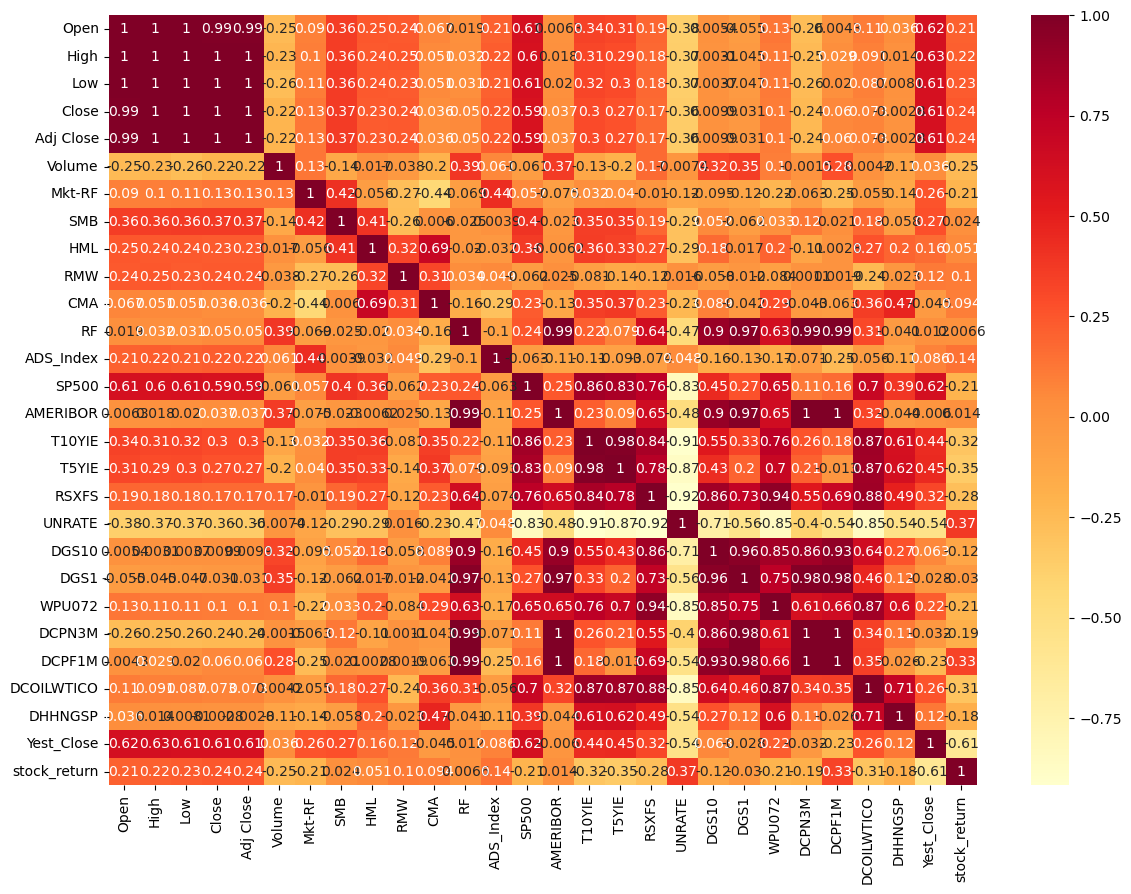

In [64]:
x = LULU_new.iloc[1:, 1:]
y = LULU_new.iloc[:, -2]
corrmat = LULU_new.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (14,10))
hm = sns.heatmap(LULU_new[top_corr_features].corr(), annot = True, cmap = "YlOrRd")

In [65]:
LULU_new.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Mkt-RF',
       'SMB', 'HML', 'RMW', 'CMA', 'RF', 'ADS_Index', 'SP500', 'AMERIBOR',
       'T10YIE', 'T5YIE', 'RSXFS', 'UNRATE', 'DGS10', 'DGS1', 'WPU072',
       'DCPN3M', 'DCPF1M', 'DCOILWTICO', 'DHHNGSP', 'Yest_Close',
       'stock_return'],
      dtype='object')

In [77]:
# Check for missing values in X
print(X.isnull().sum())


const         0
Mkt-RF        0
SMB           0
HML           0
RMW           0
CMA           0
RF            0
ADS_Index     0
SP500         0
AMERIBOR      0
T10YIE        0
T5YIE         0
RSXFS         0
UNRATE        0
DGS10         0
DGS1          0
WPU072        0
DCPF1M        6
DCOILWTICO    0
DHHNGSP       0
Yest_Close    0
dtype: int64


In [78]:
features = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'ADS_Index', 'SP500', 'AMERIBOR',
            'T10YIE', 'T5YIE', 'RSXFS', 'UNRATE', 'DGS10', 'DGS1', 'WPU072',
              'DCOILWTICO', 'DHHNGSP', 'Yest_Close']
X = LULU_new[features]/100
y = LULU_new['stock_return'] - LULU_new['RF']
X = sm.add_constant(X)

ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     4.445
Date:                Tue, 12 Dec 2023   Prob (F-statistic):            0.00988
Time:                        20:21:53   Log-Likelihood:                 47.688
No. Observations:                  30   AIC:                            -55.38
Df Residuals:                      10   BIC:                            -27.35
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4536      1.529      1.604      0.1

In [79]:
X

,const,Mkt-RF,SMB,HML,RMW,CMA,RF,ADS_Index,SP500,AMERIBOR,T10YIE,T5YIE,RSXFS,UNRATE,DGS10,DGS1,WPU072,DCOILWTICO,DHHNGSP,Yest_Close
1,1.0,-0.0291,-0.0090,-0.0097,-0.0036,0.0035,0.00000,-0.109825,28.3071,0.001508,0.0106,0.0068,4447.46,0.132,0.0064,0.0017,2.06800,0.1972,0.0169,1.8350
2,1.0,0.0052,0.0026,0.0043,-0.0001,-0.0014,0.00000,0.089921,30.5573,0.001144,0.0118,0.0084,4746.21,0.110,0.0066,0.0017,2.06300,0.3549,0.0159,2.1869
3,1.0,0.0041,-0.0171,-0.0258,-0.0042,-0.0122,0.00001,0.074320,31.1586,0.000954,0.0137,0.0117,4804.61,0.102,0.0069,0.0016,2.05900,0.3988,0.0169,3.0869
4,1.0,0.0092,0.0019,-0.0030,0.0061,0.0014,0.00000,0.020396,35.2665,0.001015,0.0176,0.0165,4924.11,0.079,0.0068,0.0012,2.06400,0.4276,0.0222,3.0862
5,1.0,0.0079,0.0079,-0.0054,-0.0002,-0.0058,0.00000,0.010812,33.8080,0.000965,0.0163,0.0148,4904.82,0.069,0.0068,0.0012,2.07400,0.3851,0.0160,3.9116
6,1.0,0.0098,-0.0008,0.0053,0.0107,0.0049,0.00000,-0.001054,36.6245,0.000770,0.0181,0.0172,4964.23,0.067,0.0092,0.0012,2.08700,0.4454,0.0289,3.4105
7,1.0,0.0173,0.0074,-0.0147,-0.0023,-0.0122,0.00000,-0.007167,37.7386,0.000708,0.0211,0.0218,4977.58,0.062,0.0109,0.0008,2.12300,0.5355,0.0288,3.7752
8,1.0,0.0263,0.0111,0.0023,-0.0041,0.0023,0.00000,0.000524,39.0182,0.000907,0.0216,0.0240,5503.49,0.061,0.0145,0.0008,2.16700,0.6054,0.0270,3.3347
9,1.0,0.0127,0.0021,0.0000,-0.0068,-0.0051,0.00000,0.016348,40.1987,0.000923,0.0235,0.0255,5525.75,0.061,0.0169,0.0006,2.23800,0.6141,0.0252,3.1483
10,1.0,0.0003,0.0141,0.0146,0.0029,0.0039,0.00000,0.003245,42.0204,0.001153,0.0246,0.0260,5484.14,0.059,0.0162,0.0004,2.34100,0.6780,0.0302,3.0107


In [80]:
y

1     0.191771
2     0.411541
3    -0.001227
4     0.267449
5    -0.128106
6     0.106934
7    -0.116683
8    -0.055897
9    -0.043706
10    0.058292
11    0.143149
12    0.085935
13    0.014765
14    0.143284
15   -0.022773
16   -0.230850
17   -0.086196
18    0.164810
19   -0.213864
20   -0.095668
21    0.169045
22   -0.059192
23    0.107956
24    0.139770
25   -0.191144
26   -0.035702
27    0.227950
28   -0.166121
29    0.140987
30    0.039282
dtype: float64

In [81]:
ff_model.params

const           2.453634
Mkt-RF         -1.703840
SMB             7.957322
HML            -4.400715
RMW             3.190907
CMA             9.356755
RF           -242.551103
ADS_Index       2.253040
SP500           0.060284
AMERIBOR       -7.494624
T10YIE        -79.303793
T5YIE          32.204978
RSXFS          -0.000460
UNRATE         -3.448596
DGS10           3.764153
DGS1           12.948108
WPU072         -0.044375
DCOILWTICO     -0.374651
DHHNGSP         1.525705
Yest_Close     -0.294295
dtype: float64

In [82]:
LULU_new.to_csv('INFOP7374_FeatureMart4GS.csv', index=True)

In [83]:
#### ridge regression ######

In [84]:
a = 0.5
model2_prep = linear_model.Ridge(alpha=a, fit_intercept=False).fit(X, y)
model2_select = X.columns[np.abs(model2_prep.coef_)>=0.001]
x = X[model2_select]
model2 = sm.OLS(y,x).fit()
print(model2.summary())
y_pred_model2 = model2.predict(x)
corr_model2 = ss.pearsonr(y_pred_model2, y)[0]
print('model 2 Ridge Regression: corr (Y, Y_pred) = '+str(corr_model2))
print('Ridge Regression selected ' +str(len(model2_select)) +' features: ', model2_select.values)



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     4.290
Date:                Tue, 12 Dec 2023   Prob (F-statistic):            0.00697
Time:                        20:28:51   Log-Likelihood:                 43.361
No. Observations:                  30   AIC:                            -50.72
Df Residuals:                      12   BIC:                            -25.50
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1073      1.292      0.857      0.4

In [ ]:
##### lasso #####

In [85]:
a = 0.5
model3_prep = linear_model.Lasso(alpha=a, fit_intercept=False).fit(X, y)
model3_select = X.columns[np.abs(model3_prep.coef_)!=0.0]
x = X[model3_select]
model3 = sm.OLS(y,x).fit()
print(model3.summary())
y_pred_model3 = model3.predict(x)
corr_model3 = ss.pearsonr(y_pred_model3, y)[0]
print('model 3 LASSO: corr (Y, Y_pred) = '+str(corr_model3))
print('LASSO selected ' +str(len(model3_select)) +' features: ', model3_select.values)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.9883
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                       0.328
Time:                        20:55:18   Log-Likelihood:                          13.848
No. Observations:                  30   AIC:                                     -25.70
Df Residuals:                      29   BIC:                                     -24.29
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------